In [369]:
import numpy as np
import matplotlib.pyplot as plt




from scipy.stats import multivariate_normal, norm

In [370]:
def q(x):
    return norm.pdf(x, loc=[2.5, 3], scale=[[3,1], [1,3]])

In [371]:
x, y = np.mgrid[-2:6:.01, -0.5:8.3:.01]

pos = np.dstack((x, y))


In [372]:
val_1 = np.random.multivariate_normal([2, 5], [[2,1],[1,2]], 100)
val_2 = np.random.multivariate_normal([3,1], [[0.1,0],[0,0.1]], 100)

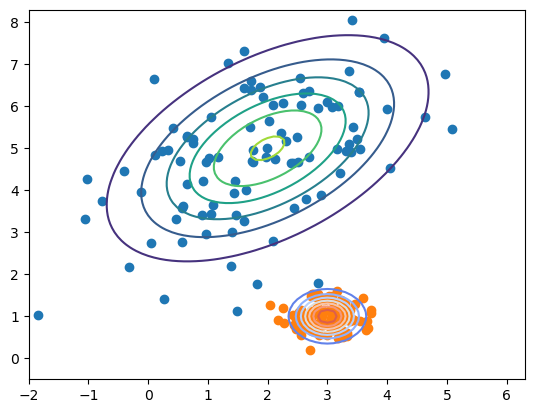

In [373]:
x1 = val_1[:,0]
y1 = val_1[:,1]

x2 = val_2[:,0]
y2 = val_2[:,1]

ax = plt.axes()

x, y = np.mgrid[-10:10:.1, -10:10:.1]
rv = multivariate_normal([2, 5], [[2,1],[1,2]])
data = np.dstack((x, y))
z = rv.pdf(data)
ax.contour(x, y, z)

x, y = np.mgrid[-10:10:.1, -10:10:.1]
rv = multivariate_normal([3,1], [[0.1,0],[0,0.1]])
data = np.dstack((x, y))
z = rv.pdf(data)
ax.contour(x, y, z, cmap='coolwarm')
ax.set_xlim([-2, 6.3])
ax.set_ylim([-0.5, 8.3])



ax.scatter(x1,y1)
ax.scatter(x2,y2)



# Rejection Sampling

In [374]:
dist_1 = multivariate_normal([2, 5], [[2,1],[1,2]], 1000)
dist_2 = multivariate_normal([3,1], [[0.1,0],[0,0.1]], 1000)

In [375]:
val_1 = np.random.multivariate_normal([2, 5], [[2,1],[1,2]], 100)
val_2 = np.random.multivariate_normal([3,1], [[0.1,0],[0,0.1]], 100)

In [376]:
def p(x):
    return multivariate_normal.pdf(x, [2, 5], [[2,1],[1,2]]) + multivariate_normal.pdf(x, [3,1], [[0.1,0],[0,0.1]])

In [377]:
def p1(x):
    return multivariate_normal.pdf(x, [2, 5], [[2,1],[1,2]])

def p2(x):
    return multivariate_normal.pdf(x, [3,1], [[0.1,0],[0,0.1]])

In [378]:
q_mean = [2.5, 4]
q_var = [[3, 0.2], [0.3, 4]]

In [379]:
def q(x):
    return multivariate_normal.pdf(x, q_mean, q_var)

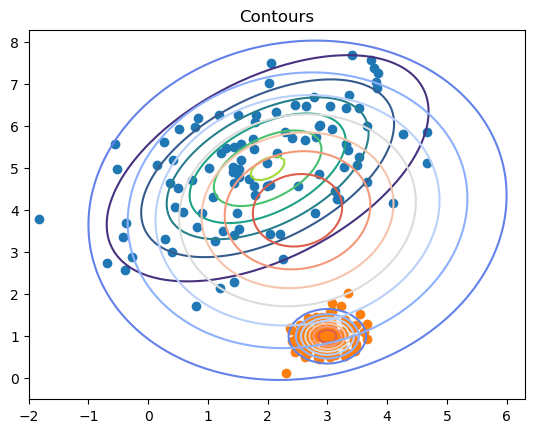

In [380]:
x1 = val_1[:,0]
y1 = val_1[:,1]

x2 = val_2[:,0]
y2 = val_2[:,1]

ax = plt.axes()#projection='3d'

x, y = np.mgrid[-10:10:.1, -10:10:.1]
data = np.dstack((x, y))
z = p1(data)
ax.contour(x, y, z)

z = p2(data)
ax.contour(x, y, z, cmap='coolwarm')
ax.set_xlim([-2, 6.3])
ax.set_ylim([-0.5, 8.3])



ax.scatter(x1,y1)
ax.scatter(x2,y2)

z = q(data)
ax.contour(x, y, z, cmap='coolwarm')
ax.set_xlim([-2, 6.3])
ax.set_ylim([-0.5, 8.3])

plt.title("Contours")
plt.savefig("fig/distributionsplotted.jpg")

In [381]:
def rejection(q_mean, q_var, q, k, dist1, dist2, w, n = 1000, 
                forced_input = False, forced_input_value = None):

    #   Defining the varibles for accepted and rejected variables.
    accepted, u_accepted, rejected, u_rejected = [],[],[],[] 

    #   Creating the samples from the provided distribution information.
    samples = np.random.multivariate_normal(q_mean, q_var, n)

    #   If the input is forced, set the samples to be the input. Used for 
    # calculating the probability for a specific value.
    if forced_input:
        samples = forced_input_value

    #   Iterating over the samples.
    for sample in samples:
        #   Calculating the mixed gaussian probability dist,
        # with the weights.
        prob_dist_1 = w[0]*dist1(sample)
        prob_dist_2 = w[1]*dist2(sample)
        combined_prob = prob_dist_1 + prob_dist_2

        u_bound = k * q(sample)

        u = u_bound #np.random.uniform(low = 0, high=u_bound)

        #   If the combined prob is less than the q dist prob
        if combined_prob > u:
            # Accept result
            accepted.append(sample)
            u_accepted.append(u)
        else:
            # else, reject the result
            rejected.append(sample)
            u_rejected.append(u)

    # Return an array of results.
    return np.array(accepted),np.array(u_accepted), np.array(rejected), np.array(u_rejected)

/var/folders/32/k9z3fjfj1yq_qk762sxmxw_80000gn/T/ipykernel_38886/744734640.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  samples = np.random.multivariate_normal(q_mean, q_var, n)


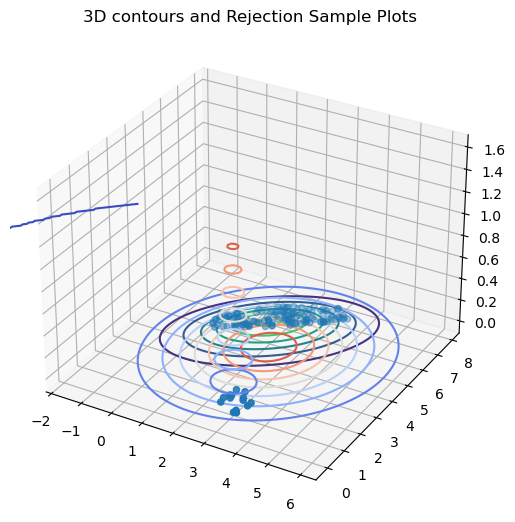

In [387]:
x1 = val_1[:,0]
y1 = val_1[:,1]

x2 = val_2[:,0]
y2 = val_2[:,1]

ax = plt.axes((1,1,1,1),projection='3d')


x, y = np.mgrid[-10:10:.1, -10:10:.1]
data = np.dstack((x, y))
z = p1(data)
ax.contour(x, y, z)

z = p2(data)
ax.contour(x, y, z, cmap='coolwarm')
ax.set_xlim([-2, 6.3])
ax.set_ylim([-0.5, 8.3])





z = q(data)
ax.contour(x, y, z, cmap='coolwarm')
ax.set_xlim([-2, 6.3])
ax.set_ylim([-0.5, 8.3])
acc, u_acc, rej, u_rej = rejection(q_mean, q_var, q, 2, p1, p2, [0.9,0.1], 1000)

#print(acc)
ax.scatter(acc[:,0],acc[:,1], u_acc)
#ax.scatter(rej[:,0],rej[:,1], u_rej, cmap='red')
#ax.scatter(4,4)

plt.title("3D contours and Rejection Sample Plots")

plt.savefig("fig/3dcontour.jpg")

In [383]:
acc, u_acc, rej, u_rej = rejection(q_mean, q_var, q, 1, p1, p2, [0.9,0.1], 100000, True, [[4,4]])
print(rej)
print(u_rej)

print(acc)
print(u_acc)

[[4 4]]
[0.03160626]
[]
[]


/var/folders/32/k9z3fjfj1yq_qk762sxmxw_80000gn/T/ipykernel_38886/744734640.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  samples = np.random.multivariate_normal(q_mean, q_var, n)


# Importance Sampling

In [384]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [390]:
def importance(q, w, dist1, dist2, vals):
    #   Calculate the weights from the distributions
    weights = ((w[0] * dist1(vals)) + (w[1] * dist2(vals))) / q(vals) #np.sum(((w[0] * dist1(samples)) + (w[1] * dist2(samples))))
    weights = weights * q(vals)

    #   Calculate the probability by multiplying by the weights.
    y = np.sum(weights*vals)/len(vals)

    #   Return the probability.
    return y

print(importance(q, [0.9,0.1],  p1, p2, np.array([4,4])))




0.03207806875773597
